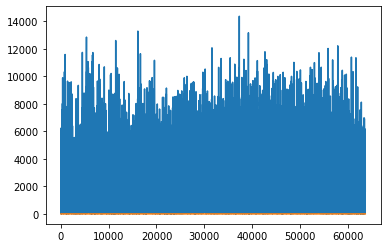

In [27]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
rate, data = wav.read('sample.wav')
fft_out = fft(data)
%matplotlib inline
plt.plot(np.abs(fft_out))
# plt.ylim(0, 2000) 
# plt.xlim(-1000,1000)
plt.show()

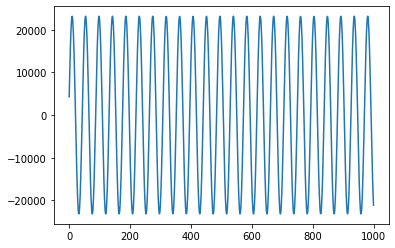

In [16]:
plt.plot(data[40000:41000])
plt.show()

In [12]:
print(data)

[   0 3290 6514 ...  -30   -7    0]
